# Books dataset analysis

* Data exploration and cleaning
* Features enginering
* Models raining and evaluation
* Choice of the model

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mlxtend in c:\users\lataw\anaconda3\lib\site-packages (0.19.0)



In [3]:
import  pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [127]:
books=pd.read_csv('books.csv',error_bad_lines = False,sep=',')

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [5]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# DATA first exploration

In this part i will focus on exploring the features of the dataset. Types of the variables,distributions etc.

Theses steps will help to make a choice when transforming the features

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


So we have 11 columns from differents types,and the dataset contains 11123 rows! Let's check missing values and correct the names

In [128]:
books.rename(columns = {'  num_pages':'num_pages'},inplace=True)### we rename the column num_pages

In [8]:
books.isnull().sum()### so we don't have any missing values in the dataset!

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [129]:
print("number of unique books "+str(len(books.bookID.unique())))
print("numbers of unique authors "+str(len(books.authors.unique())))
print("numbers of unique title "+str(len(books.title.unique())))

number of unique books 11123
numbers of unique authors 6639
numbers of unique title 10348


This means we have authors in this dataset having written morethan one book. And more we have 10348 unique title meaning some books have maybe been published by more than one publisher with different illustrator. We have an example with the book 'The Known World'

In [10]:
example=books[books["title"]=="The Known World"]
example

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
39,67,The Known World,Edward P. Jones,3.83,0061159174,9780061159176,eng,388,29686,2626,8/29/2006,Amistad
40,68,The Known World,Edward P. Jones/Kevin R. Free,3.83,006076273X,9780060762735,en-US,14,55,12,6/15/2004,HarperAudio
41,69,The Known World,Edward P. Jones,3.83,0060749911,9780060749910,eng,576,22,3,6/15/2004,Harper
3193,11684,The Known World,Edward P. Jones,3.83,0007195303,9780007195305,eng,388,449,83,10/1/2004,Harper Perennial


This example gives us some informations. The books has endeed been published by several publishers and at differents dates,but we can see that the number of page change between the differents publications.We have the same average rating in other hand

In [11]:
print("numbers of unique authors "+str(len(books.publication_date.unique())))

numbers of unique authors 3679


So some books have been published at the same times. The publication_date is in format Month/Day/Year but we need to cast it so that the type changes from
simple object to a datetime if we want to use it

In [12]:
#books["publication_date"].astype('datetime64[ns]')

"This transformation produce an error (day out of 'range for month' so maybe some dates are innacurate"

"This transformation produce an error (day out of 'range for month' so maybe some dates are innacurate"

## Let's have at some statistics and distributions of numeric variables

### 1. Average Rating

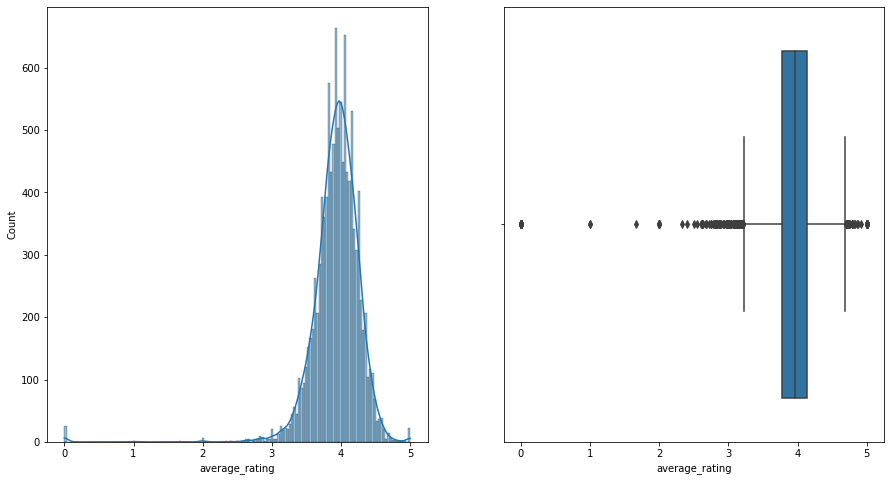

In [13]:
fig, axs = plt.subplots(figsize=(15, 8),ncols=2)
sns.histplot(data=books, x="average_rating", kde=True,ax=axs[0])
sns.boxplot(data=books, x="average_rating",ax=axs[1])
plt.show()

We can see that the avere_ratings has a normal distribution (a shapiro test would give the same information but as we have more than 5000 observations
the p_value coul be not accurate).

We can also see that there are some missing values

### 2.Num Pages

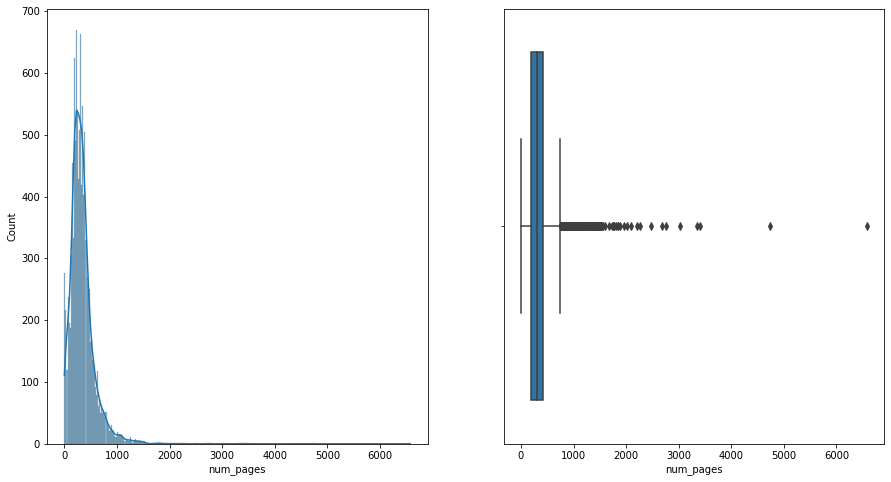

In [14]:
fig, axs = plt.subplots(figsize=(15, 8),ncols=2)
sns.histplot(data=books, x="num_pages", kde=True,ax=axs[0])
sns.boxplot(data=books, x="num_pages",ax=axs[1])
plt.show()

The number of pages is skewed to the left we can use of log transformation to have a better view of the data. Also as for the average_rating we have outliers values

### 3.TEXT_REVIEWS_COUNT

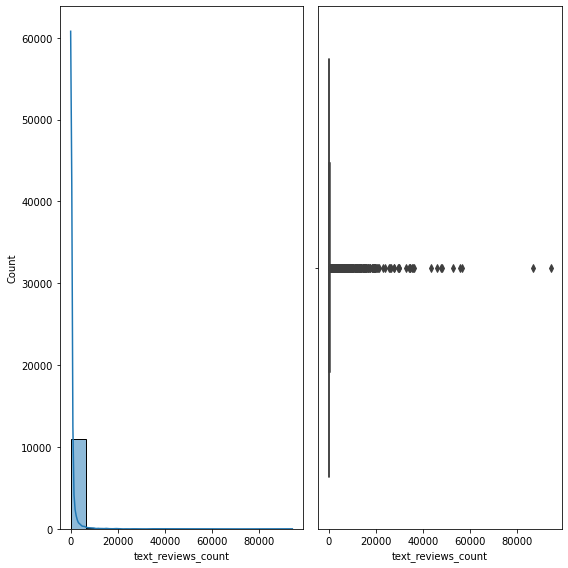

In [15]:
fig, axs = plt.subplots(figsize=(8, 8),ncols=2)
sns.histplot(data=books, x="text_reviews_count",bins=14, kde=True,ax=axs[0])
sns.boxplot(data=books, x="text_reviews_count",orient="h",ax=axs[1])
plt.tight_layout()
plt.show()

As for the number of pages the number of review is skewed to the left but we can see that we have a lot of outliers in the data makingt the boxplot hard to read

### 4.Rating counts

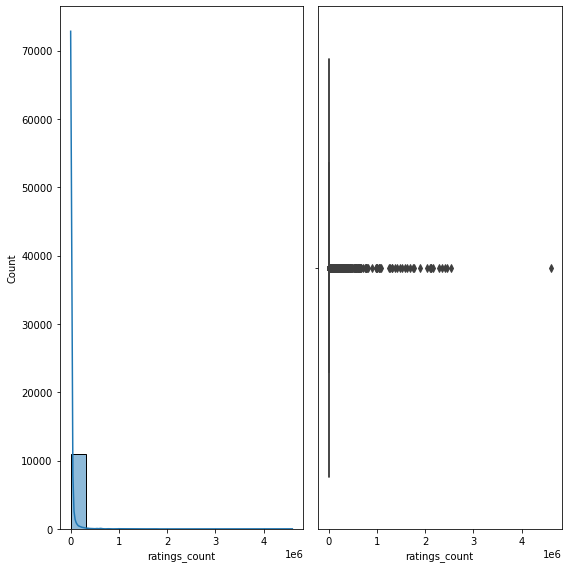

In [16]:
fig, axs = plt.subplots(figsize=(8, 8),ncols=2)
sns.histplot(data=books, x="ratings_count",bins=14,kde=True,ax=axs[0])
sns.boxplot(data=books, x="ratings_count",orient="h",ax=axs[1])
plt.tight_layout()
plt.show()

We have the same conclusion as for the three previous features. The rating counts distribution is skew and there are a lot of outliers.

### 4.Language code

For the language code we will be looking at a pie chart to vizualise the distribution

<AxesSubplot:title={'center':'language code distribution'}, ylabel='None'>

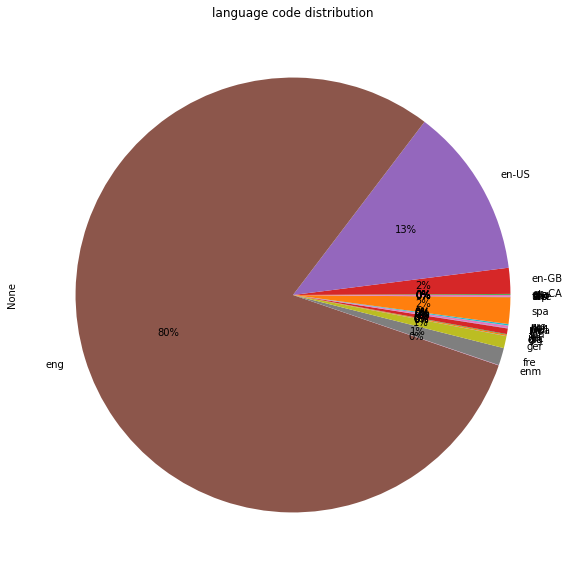

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
books.groupby(['language_code']).size().plot(kind='pie', y='points', autopct='%1.0f%%',
                                title='language code distribution',ax=ax)

In [20]:
print("number of unique languages "+str(len(books.language_code.unique())))

number of unique languages 27


The plot shows that 80% of the books are written in english. Some values can't be distinguish meaning there are cleary minorities.

### 5.HAVE a look at the describe

In [21]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


For the number ofpages 75% are equal or lesser that 416, for text_reviews_count equal or lesser than 238 and for the number of ratings equal or lesser than 5000. I will be using IQR, Quartile1 and Quartile3 to remove outlier and the feature engineering part. We can also see some odds values like 0 for the number of books.

### Extraction of illustrators

We noticed the names of authors contains also names of illstrators so we will split the names to get only the names of the authors on a new columns and we will create a new boolean for illistrator(1 if a books has illustrator 0 otherwise)

In [130]:
def splitAuthorName(text):
    """
    text: contains of authors column
    return authorsname
    """
    
    x=text.split("/")
    author=x[0]
    return author


def IllustratorOrNot(text):
    """
    text: contains of authors column
    return 1 if illustrator present 0 otherwise
    """
    
    x=text.split("/")
    illusorNot=0
    
    if(len(x)>1):
        illusorNot=1
    return illusorNot

books["Authors"]=books["authors"].apply(splitAuthorName)
books["Illustrator"]=books["authors"].apply(IllustratorOrNot)

### Categorical variables

In [131]:
categorical = ['title', 'Authors', 'language_code']
books[categorical].describe()

,title,Authors,language_code
count,11123,11123,11123
unique,10348,4215,27
top,The Iliad,William Shakespeare,eng
freq,9,88,8908


As we saw before we have 27 language, the who has written the most is William Shakespeare and the most published book is The Iliad.

### First conclusion

This first analysis hav given some informations. Numerical features except for the average_ratings and the identifier are skew and presents a lot of outlier to be taken care. The column can contains also the names of illustrator when for example a book has been published at a different date with a different publisher.
Most of the books are written in english and the data does not contains any missing values.


# Data analysis and some insight on the data

## Ratings,rating counts and text review count

### Number of books by average rating

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.88'),
  Text(3, 0, '3.89'),
  Text(4, 0, '3.9'),
  Text(5, 0, '3.92'),
  Text(6, 0, '3.93'),
  Text(7, 0, '3.94'),
  Text(8, 0, '3.96'),
  Text(9, 0, '3.97'),
  Text(10, 0, '3.98'),
  Text(11, 0, '3.99'),
  Text(12, 0, '4.0'),
  Text(13, 0, '4.02'),
  Text(14, 0, '4.04'),
  Text(15, 0, '4.05'),
  Text(16, 0, '4.06'),
  Text(17, 0, '4.07'),
  Text(18, 0, '4.09'),
  Text(19, 0, '4.17')])

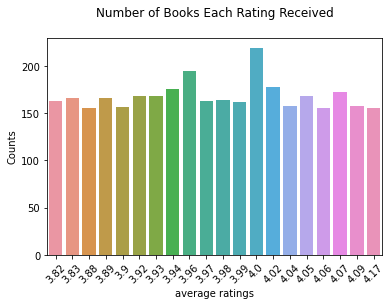

In [118]:
sns.barplot(books['average_rating'].value_counts().head(20).index, books['average_rating'].value_counts().head(20))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('average ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

A lot of books recieved rate of 4

### Top 10 books based on number of rating

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

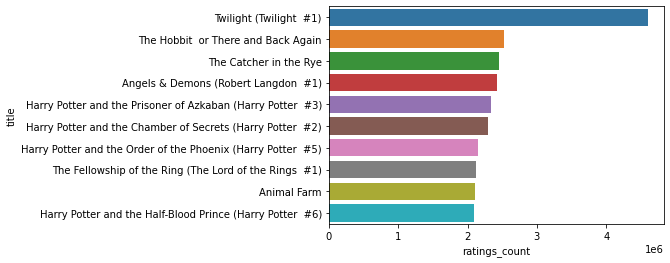

In [105]:
highest_rated_books = books.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(highest_rated_books, highest_rated_books.index)

### Top 10 books based on text reviews

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

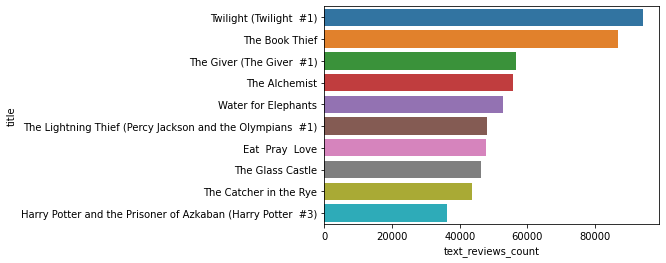

In [120]:
# Top 10 books base on nb reviews
top_10_highest_reviews = books.nlargest(10, ['text_reviews_count'])
sns.barplot(top_10_highest_reviews['text_reviews_count'], top_10_highest_reviews['title'])

### Books that have received an average rating of 5 (does not take into account the number of rating)

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='average_rating', ylabel='title'>

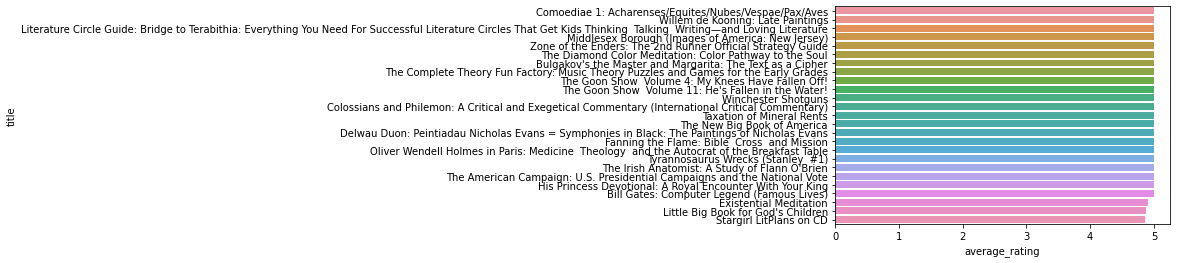

In [115]:
top_rated_books = books.nlargest(22, ['average_rating']).set_index('title')['average_rating']
sns.barplot(top_rated_books, top_rated_books.index)

### Books that have received an best average rating and published more than once

## Authors

### Top 10 authors based on ratings count

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Nb Ratings')

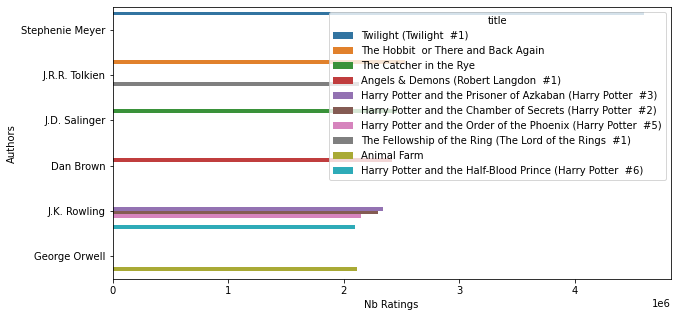

In [25]:
plt.figure(figsize=(10, 5))
authors = books.nlargest(10, ['ratings_count']).set_index('Authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Nb Ratings')

### Top authors based on text review

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Nb Ratings')

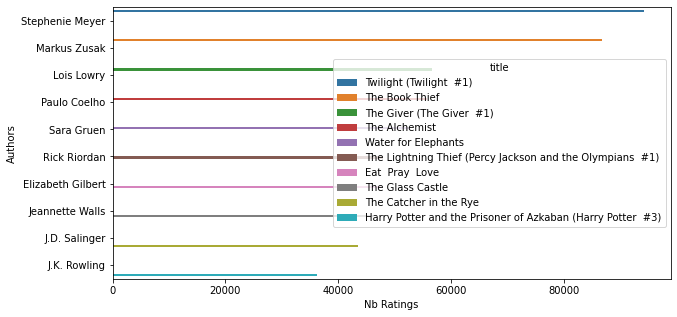

In [26]:
plt.figure(figsize=(10, 5))
text_review = books.nlargest(10, ['text_reviews_count']).set_index('Authors')
sns.barplot(text_review['text_reviews_count'], text_review.index, ci = None, hue = text_review['title'])
plt.xlabel('Nb Ratings')

### Illustrated vs Not

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

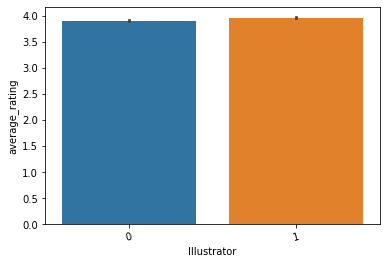

In [27]:
sns.barplot(books['Illustrator'],books['average_rating'])
plt.xticks(rotation=15)

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

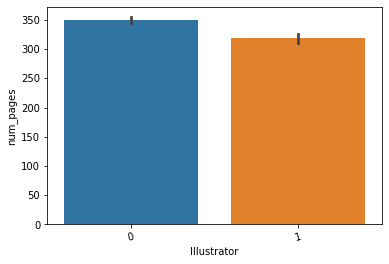

In [28]:
sns.barplot(books['Illustrator'],books['num_pages'])
plt.xticks(rotation=15)

### Top 7 languages

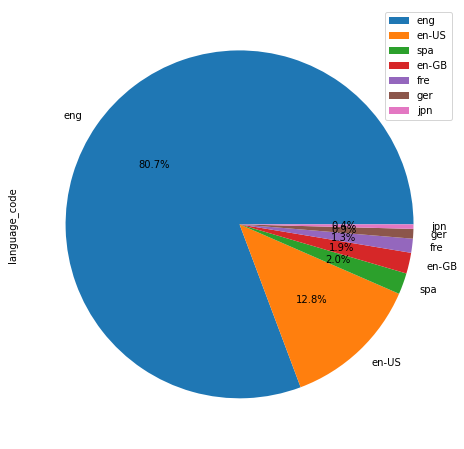

In [30]:
books['language_code'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

## Publication

### Top 10 published books

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of Publications')

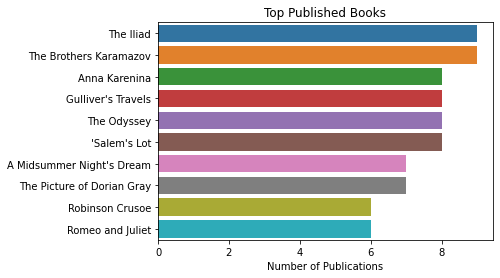

In [31]:
sns.barplot(books['title'].value_counts()[:10], books['title'].value_counts().index[:10])
plt.title('Top 10 Published Books')
plt.xlabel('Number of Publications')

### Authors with the most books

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of Publications')

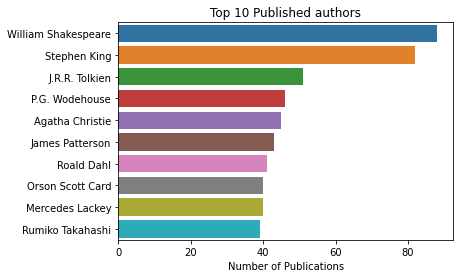

In [32]:
sns.barplot(books['Authors'].value_counts()[:10], books['Authors'].value_counts().index[:10])
plt.title('Top 10 Published authors')
plt.xlabel('Number of Publications')

### Top publishers

C:\Users\lataw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of Publications')

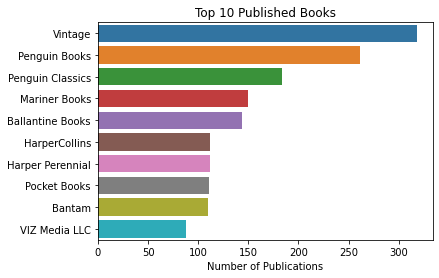

In [33]:
sns.barplot(books['publisher'].value_counts()[:10], books['publisher'].value_counts().index[:10])
plt.title('Top 10 Published Books')
plt.xlabel('Number of Publications')

### Average rating vs numerical features

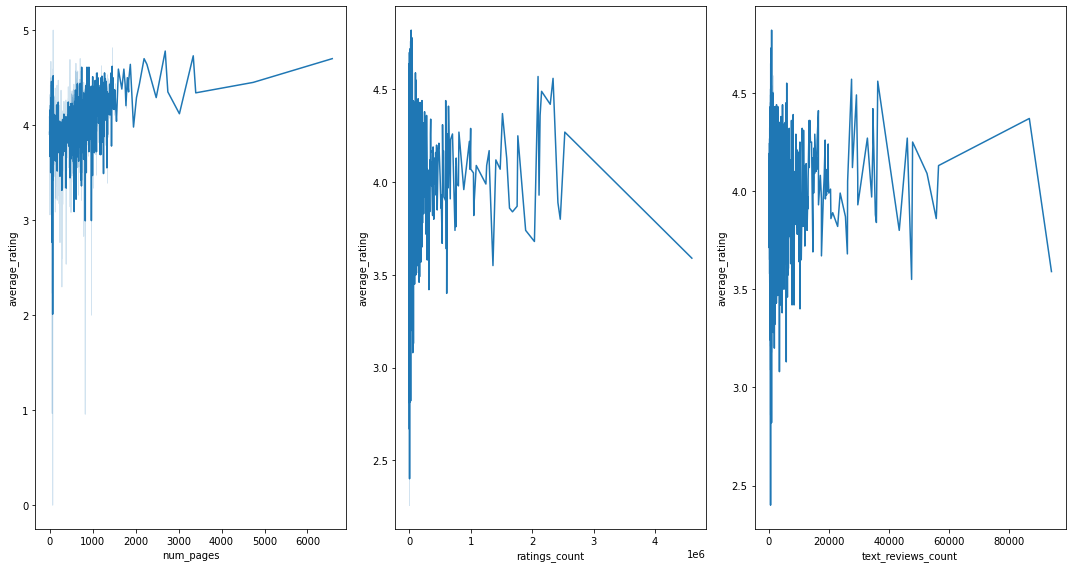

In [36]:
fig, axs = plt.subplots(figsize=(15, 8),ncols=3)
sns.lineplot(data=books, x="num_pages", y="average_rating",ax=axs[0])
sns.lineplot(data=books, x="ratings_count", y="average_rating",ax=axs[1])
sns.lineplot(data=books, x="text_reviews_count", y="average_rating",ax=axs[2])
plt.tight_layout()
plt.show()

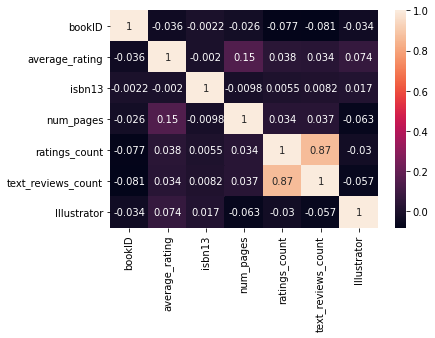

In [38]:
corrMatrix = books.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can't say there is a notable correlation between the average ratings and the these features. On the other hand we have a strong correlation between the rating count and the text review count

# Feature engineering & Selection

I choose not to use the identifiers, the titles and the publication date as they don't brig any statistical information. As we need to predict the average ratings the basics features of the books seems to be the most appropriate

In [132]:
books=books.drop(["title",'bookID',"isbn","isbn13","authors","publication_date"],axis=1)####dropping unused variable

## 1.Taking care of outliers

To take care of the outlier i choose to eliminate all values below Q1-1.5*IQR above Q3+1.5*IQR.
Other inacurate values like bookd with zeros pages or zero ratings_counts will be dropped.

In [133]:
def remove_outlier(df_in, col_name, thres=1.5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-thres*iqr
    fence_high = q3+thres*iqr
    df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] <fence_high)]
    return df_in

In [134]:
books=remove_outlier(books,"num_pages")
books=remove_outlier(books,"ratings_count")
books=remove_outlier(books,"text_reviews_count")

Now we willbe removing inacurate values

In [135]:
books=books[books["num_pages"]>0]
books=books[books["ratings_count"]>0]
books=books[books["text_reviews_count"]>0]

In [136]:
books.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,Illustrator
count,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000
mean,3.928539,294.151158,1123.036179,52.837330,0.448540
std,0.288718,157.036163,1803.669312,61.119237,0.497379
min,1.670000,1.000000,1.000000,1.000000,0.000000
25%,3.760000,188.000000,88.000000,8.000000,0.000000
50%,3.940000,278.000000,372.000000,27.000000,0.000000
75%,4.120000,384.000000,1341.000000,78.000000,1.000000
max,5.000000,749.000000,12122.000000,255.000000,1.000000


Let's now have a look again!

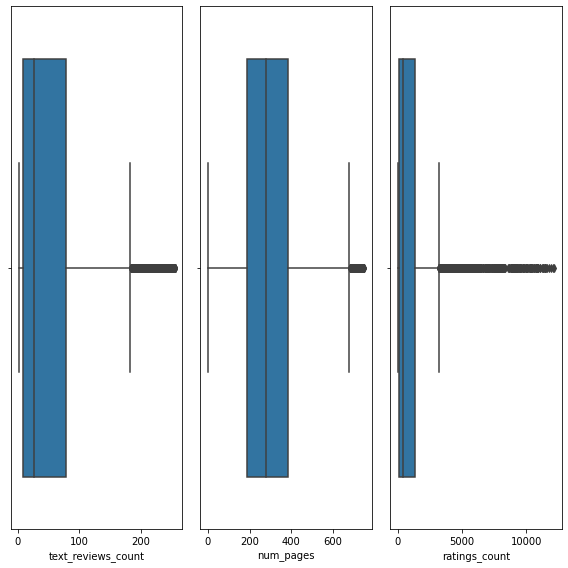

In [50]:
fig, axs = plt.subplots(figsize=(8, 8),ncols=3)
sns.boxplot(data=books, x="text_reviews_count",orient="h",ax=axs[0])
sns.boxplot(data=books, x="num_pages",orient="h",ax=axs[1])
sns.boxplot(data=books, x="ratings_count",orient="h",ax=axs[2])
plt.tight_layout()
plt.show()

The data seems to have less outliers and inacurate values. However there is still a lot of outliers for the ratings_cout. As we can see in the describe 75% of the values are below or equal to 1341. So i decodeto cut the values above 2000

In [137]:
books=books[books["ratings_count"]<=2500]

In [34]:
books.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,Illustrator
count,6309.000000,6309.000000,6309.000000,6309.000000,6309.000000
mean,3.917218,289.987954,534.071168,38.472658,0.455381
std,0.294155,157.661541,617.785498,46.606980,0.498045
min,1.670000,1.000000,1.000000,1.000000,0.000000
25%,3.750000,183.000000,70.000000,6.000000,0.000000
50%,3.930000,272.000000,265.000000,20.000000,0.000000
75%,4.110000,384.000000,800.000000,53.000000,1.000000
max,5.000000,749.000000,2500.000000,255.000000,1.000000


We now have a dataset with 6309 observations

### 2. Transform data for machine learning

#### Log transformation, get dummies and labelEncoder

As we have seen the ID is not a good predictor as their are unique identifier as isbn so we won't use them to build our models.
Since there is top author in rating and number of books publish we will be using LabelEncoder to transform the author column(same for the publisher)!
The language-code will be transform using dummmies (as there is no order they are categorical values)

if rating_count==0 or text_reviews_count==0 then average_rating=0

#### LabelEncoding of author and publisher

In [138]:
labelEncodeAuthor = preprocessing.LabelEncoder()
books['Authors'] = labelEncodeAuthor.fit_transform(books['Authors'])
                                                  
labelEncodePublisher = preprocessing.LabelEncoder()
books['publisher'] = labelEncodePublisher.fit_transform(books['publisher'])                                             

#### dummies of languages_code

In [139]:
language_dummies = pd.get_dummies(books['language_code'])
books = pd.concat([books, language_dummies], axis=1)
books=books.drop(['language_code'],axis=1)

Now let's transform the continous data

#### Log transformation of numerical variables

In [141]:
books_feat=books.copy()

In [38]:
#books_feat["num_pages"]=np.log(books["num_pages"])
#books_feat["ratings_count"]=np.log(books["ratings_count"])
#books_feat["text_reviews_count"]=np.log(books["text_reviews_count"])

In [265]:
#books[["num_pages","ratings_count","text_reviews_count"]] = pd.DataFrame(
#    pt.fit_transform(books[["num_pages","ratings_count","text_reviews_count"]]), columns=["num_pages","ratings_count","text_reviews_count"]
#)

# Let's train some model

## Linear regression

### Train

In [142]:
X=books_feat.drop(["average_rating"],axis=1)
y=books_feat["average_rating"]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [144]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
Pedicted_Scores = linReg.predict(X_test)

In [145]:
print(linReg.score(X_train,y_train))

0.04932502887311785


### Test

In [146]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.22141019730720926
Mean Squared Error (MSE): 0.08118552114634281
Root Mean Squared Error (RMSE): 0.2849307304352109


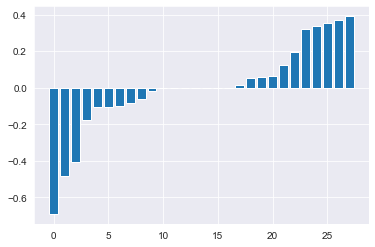

In [148]:
importance=linReg.coef_
importance=np.sort(importance)
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

### Step-wise regression

### Train

In [149]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = SFS(clf,k_features = 6,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X,y)

In [150]:
sfs1.k_score_

0.034731754761715174

### Selected features

In [116]:
sfs1.k_feature_names_

('num_pages',
 'ratings_count',
 'text_reviews_count',
 'Illustrator',
 'jpn',
 'mul')

### Random Forest Regression

#### Train

In [108]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [110]:
Pedicted_Scores=regressor.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.21253279073277487
Mean Squared Error (MSE): 0.07588036054722806
Root Mean Squared Error (RMSE): 0.27546390062443404


## Gradient Boosting

In [91]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.001,
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)
Pedicted_Scores=gbr.predict(X_test)
print("Model score: %.3f" % gbr.score(X_test, y_test))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Model score: 0.076
Mean Absolute Error (MAE): 0.21522581959742304
Mean Squared Error (MSE): 0.07800682201242927
Root Mean Squared Error (RMSE): 0.27929701396976886


### Gradient Boosting with greadSearch

In [92]:
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train, y_train)
Pedicted_Scores=regr.predict(X_test)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Model Accuracy: 0.076
Mean Absolute Error (MAE): 0.21277700626367818
Mean Squared Error (MSE): 0.07591039486577006
Root Mean Squared Error (RMSE): 0.2755184111194206


## Does scaling the data has an impact

Scaling the independant variables is a common use in regression as it put the variables at relatively at the same magnitude. In other hand the result are more interpretable as we can distinguish more important variable.

We will be using a standard scaler

In [96]:
sc = StandardScaler()
books_feat[["num_pages","ratings_count","text_reviews_count"]] = sc.fit_transform(books_feat[["num_pages","ratings_count","text_reviews_count"]])

In [97]:
books_feat

,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Authors,Illustrator,ale,ara,en-CA,...,jpn,lat,mul,nl,nor,por,rus,spa,tur,zho
5,3.74,-0.875286,-0.833804,-0.804078,1058,3072,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4.22,-1.801393,1.184856,4.603266,1276,743,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3.87,-0.215593,2.515520,1.985425,253,293,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,4.50,-0.418575,-0.283408,-0.696789,768,1597,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,3.84,1.700055,1.450341,0.440470,1235,595,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,4.06,1.408268,-0.612027,-0.396381,386,3147,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,4.08,2.188482,0.402969,0.376097,1155,3147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,3.96,0.792977,0.462865,1.212948,1155,3147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,3.72,0.913498,0.380306,2.157087,477,3147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Linear regression

#### Train

In [157]:
X=books_feat.drop(["average_rating"],axis=1)
y=books_feat["average_rating"]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
linReg = LinearRegression()
linReg.fit(X_train, y_train)
Pedicted_Scores = linReg.predict(X_test)

#### Test

In [159]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.22141019730720926
Mean Squared Error (MSE): 0.08118552114634281
Root Mean Squared Error (RMSE): 0.2849307304352109


### Step-wise regression

### Train

In [160]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = SFS(clf,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X,y)

In [161]:
sfs1.k_score_

0.03373793214183292

#### Selected Features

In [162]:
sfs1.k_feature_names_

('num_pages', 'ratings_count', 'text_reviews_count', 'Illustrator', 'jpn')

### Random Forest regression

#### Train

In [163]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

#### Test

In [164]:
Pedicted_Scores=regressor.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.21277700626367818
Mean Squared Error (MSE): 0.07591039486577006
Root Mean Squared Error (RMSE): 0.2755184111194206


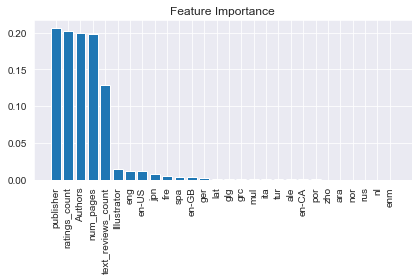

In [165]:
importances = regressor.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### Conclusion

The results are the sames. And we can conclude that the ratings are influenced by the num_pages, the rating count the text_reviex count and the presence or not of Illustration

### Model chosen to deloy via docker

I choose to deploy the Simple Linear model with just as variable Author,Num_page, text_review_Count and publisher

In [168]:
books

,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Authors,Illustrator,ale,ara,en-CA,...,jpn,lat,mul,nl,nor,por,rus,spa,tur,zho
5,3.74,152,19,1,1058,3072,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4.22,6,1266,253,1276,743,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3.87,256,2088,131,253,293,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,4.50,224,359,6,768,1597,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,3.84,558,1430,59,1235,595,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,4.06,512,156,20,386,3147,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,4.08,635,783,56,1155,3147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,3.96,415,820,95,1155,3147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,3.72,434,769,139,477,3147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
#X_selected=sfs1.transform(books)
X_train, X_test, y_train, y_test = train_test_split(books[["num_pages","ratings_count","text_reviews_count","publisher","Authors"]], y, test_size = 0.2, random_state = 20)
linRegDeploy = LinearRegression()
linRegDeploy.fit(X_train, y_train)
Pedicted_Scores = linRegDeploy.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.2231959230643831
Mean Squared Error (MSE): 0.08271770687387137
Root Mean Squared Error (RMSE): 0.2876068616599252


#### Saving encoder and model for inference

In [156]:
import joblib

joblib.dump(labelEncodeAuthor, 'labelEncodeAuthor.joblib')
joblib.dump(labelEncodePublisher, 'labelEncodePublisher.joblib')
#label_encoder = joblib.load('label_encoder.joblib')

['labelEncodePublisher.joblib']

In [154]:
labelEncodePublisher.inverse_transform([45])

array(['Alianza Editorial'], dtype=object)

In [155]:
labelEncodeAuthor.inverse_transform([45])

array(['Alden T. Vaughan'], dtype=object)

In [172]:
joblib.dump(linRegDeploy , 'reg_1.sav')

['reg_1.sav']

In [173]:
X= np.array([333,1000,30,40,50])

In [175]:
linRegDeploy.predict(X.reshape(1,-1))

array([3.94588916])